In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\priya\\Documents\\end-end_Projects\\maternalhealthrisk\\notebooks'

In [3]:
cd ..

C:\Users\priya\Documents\end-end_Projects\maternalhealthrisk


In [4]:
df = pd.read_csv('maternal_health_risk.csv')

In [5]:
df

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]

## Check Missing values

In [6]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

## Check Duplicates

In [7]:
df.duplicated().sum()

562

In [8]:
duplicate = df[df.duplicated(["HeartRate", "BS","BodyTemp","RiskLevel","Age","SystolicBP", "DiastolicBP"])]
duplicate

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]

## Distribution of patients wrt each feature, together with ratio of risk levels


<Figure size 1600x1600 with 0 Axes>

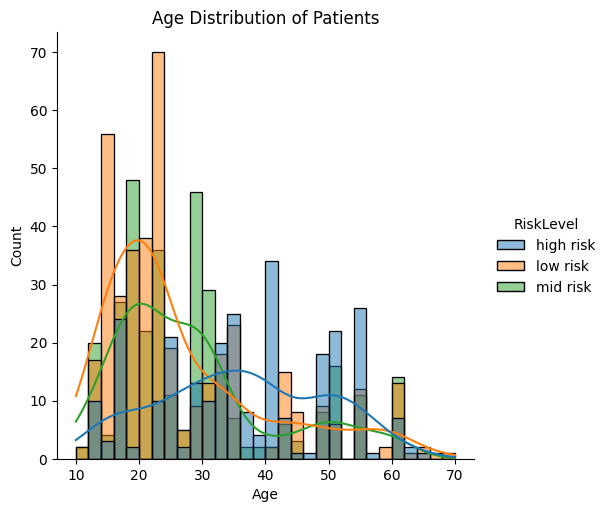

<Figure size 1600x1600 with 0 Axes>

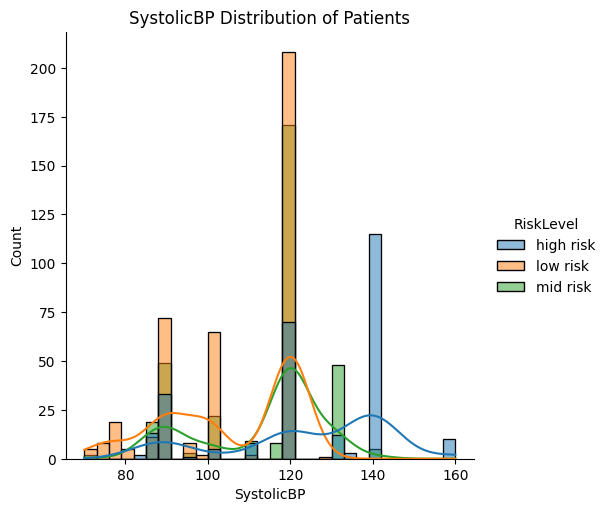

<Figure size 1600x1600 with 0 Axes>

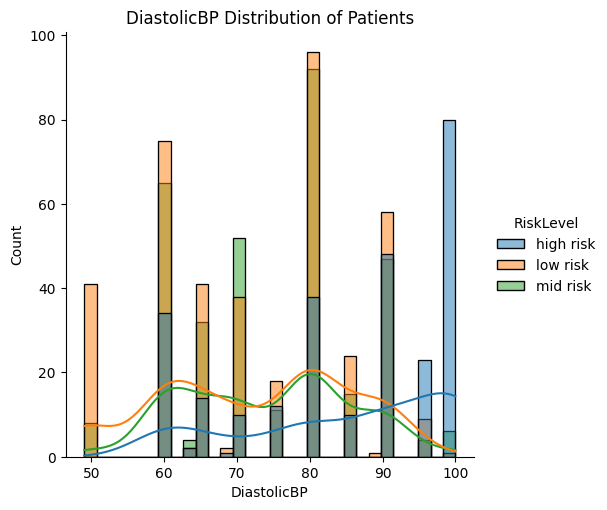

<Figure size 1600x1600 with 0 Axes>

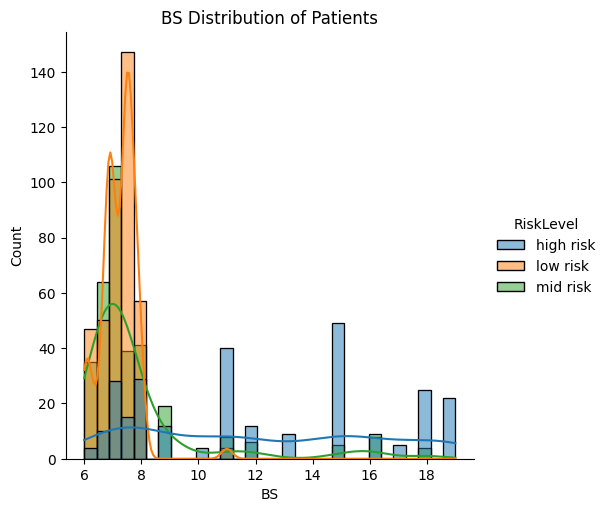

<Figure size 1600x1600 with 0 Axes>

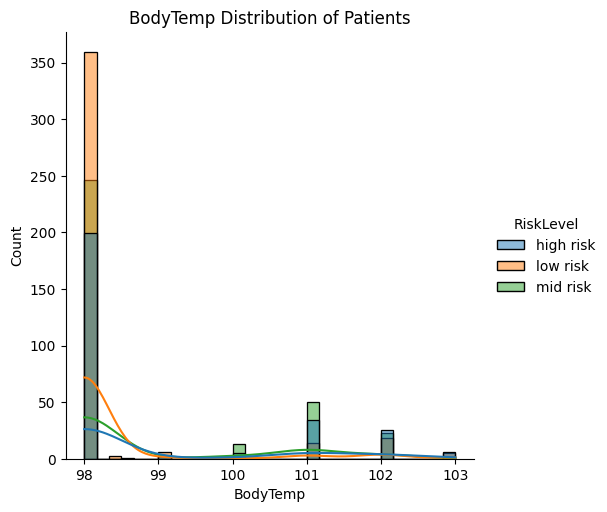

<Figure size 1600x1600 with 0 Axes>

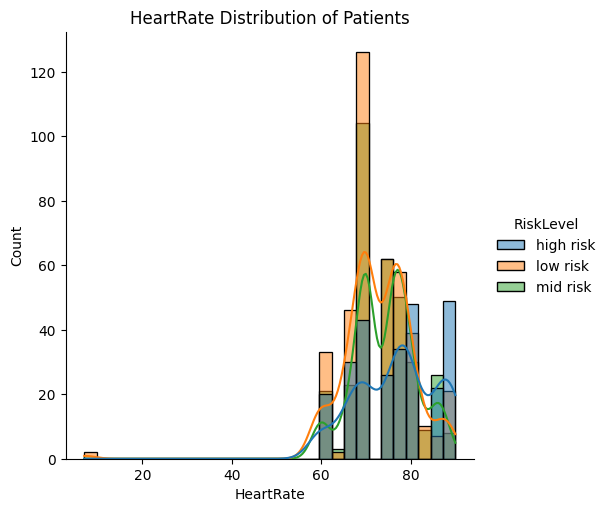

In [25]:
columns = df.columns[:len(df.columns) - 1]
for column in columns:
    plt.figure(figsize=(8,8), dpi=200)
    sns.displot(data=df, x=str(column), kde=True, hue="RiskLevel", bins=30).set(title="{} Distribution of Patients".format(str(column)))
    plt.show()

[Text(0.5, 1.0, 'Number Of Patients In Each Risk Category')]

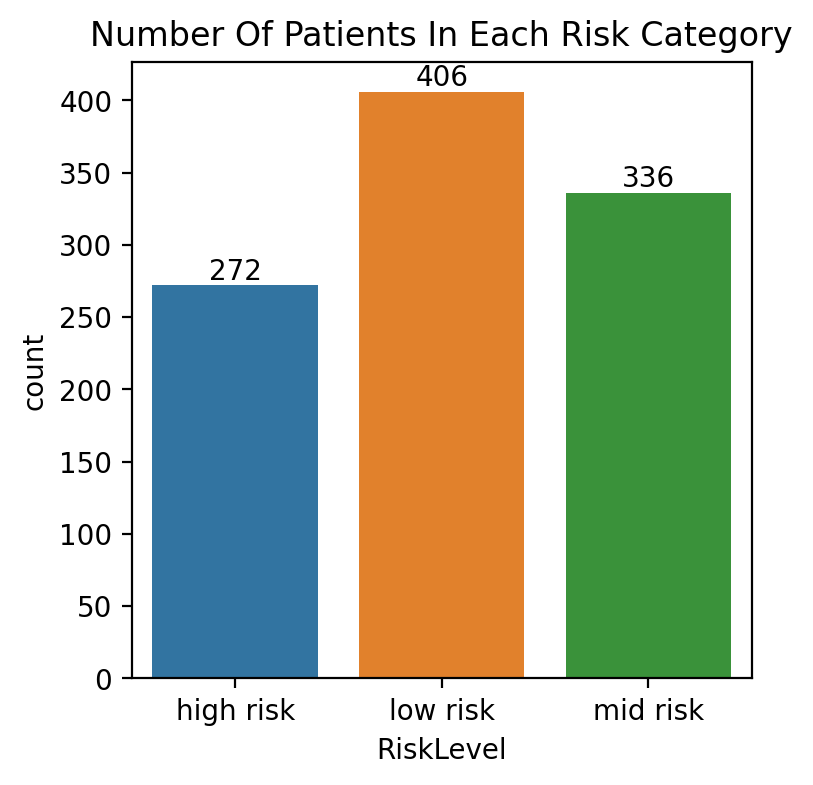

In [73]:
plt.figure(figsize=(4,4), dpi=200)
ax= sns.countplot(data=df, x="RiskLevel")
ax.bar_label(ax.containers[0])
ax.set(title="Number Of Patients In Each Risk Category")

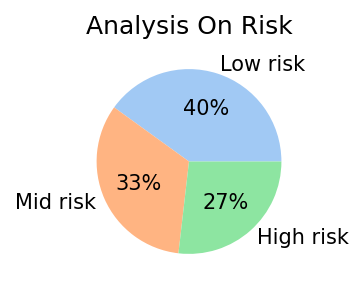

In [27]:
plt.figure(figsize=(2,2), dpi=150)
labels = ['Low risk', 'Mid risk', 'High risk']
low_risk = df[df['RiskLevel'] == 'low risk']
mid_risk = df[df['RiskLevel'] == 'mid risk']
high_risk = df[df['RiskLevel'] == 'high risk']
data = [len(low_risk), len(mid_risk), len(high_risk)]
colors = sns.color_palette('pastel')[0:5]
fig = plt.pie(x=data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Analysis On Risk')
plt.show()

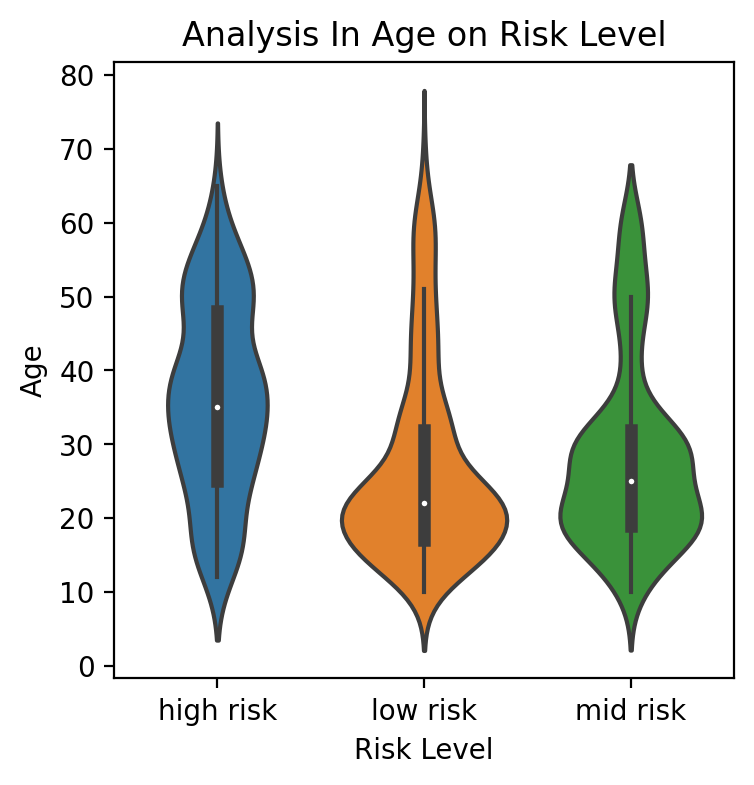

In [83]:
fig = plt.figure(figsize=(4,4), dpi=200)
sns.violinplot(x="RiskLevel", y="Age", data=df).set(title="Analysis In Age on Risk Level", xlabel="Risk Level")
plt.show()

# Correlation Matrix

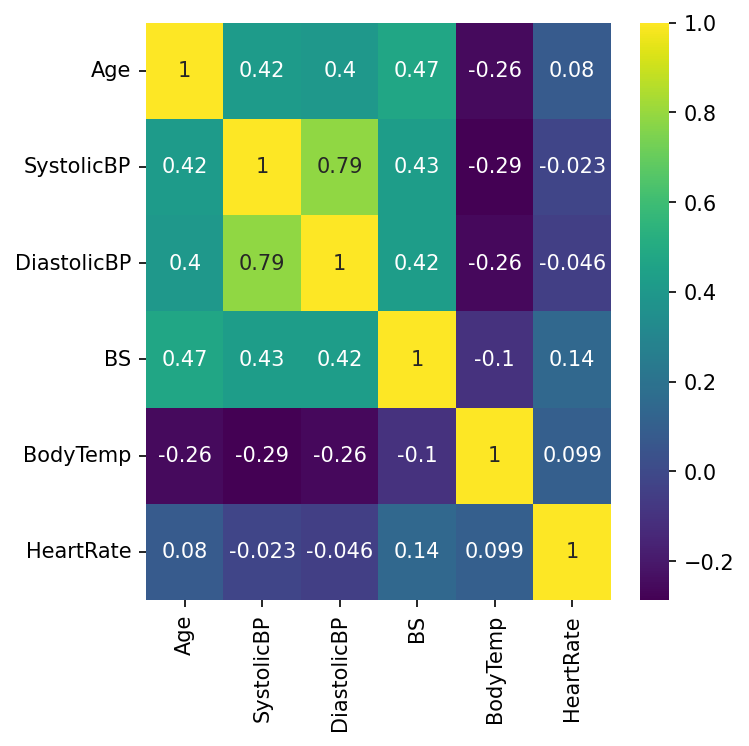

In [82]:
plt.figure(figsize=(5,5), dpi=150)
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

 ## MUTIVARIATE ANALYSIS USING PAIRPLOT

<Figure size 1280x960 with 0 Axes>

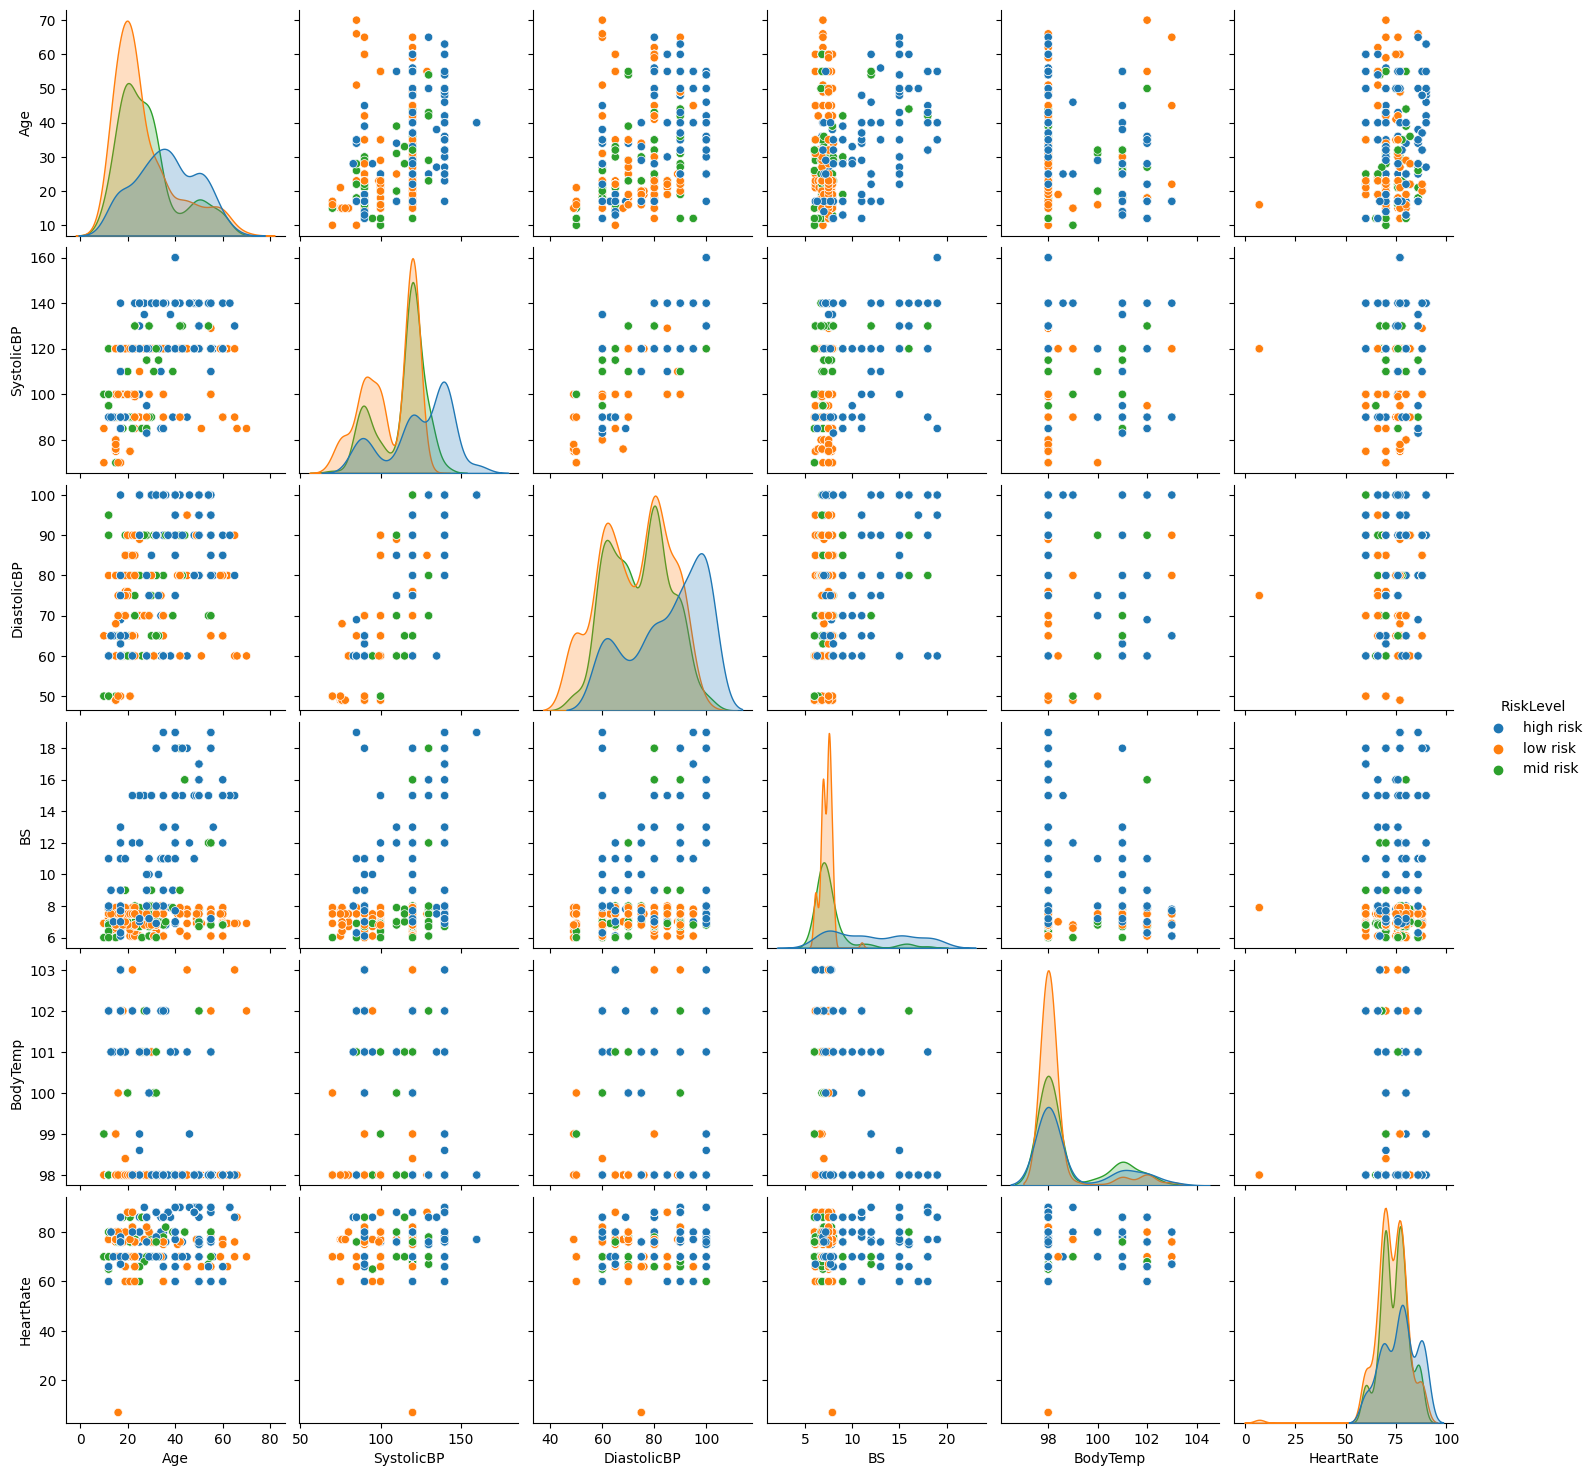

In [78]:
plt.figure(dpi=200)
sns.pairplot(df, hue='RiskLevel')
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [86]:
df.describe()


Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000

In [87]:
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [104]:
X = df.drop(columns=['RiskLevel'],axis=1)
y = df['RiskLevel']

In [105]:
X

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]

In [106]:

scaler= StandardScaler()

In [107]:
X = scaler.fit_transform(X)

In [76]:
X

array([[-0.36173812,  0.91339632,  0.25502279,  1.90589019, -0.4852155 ,
         1.44695615],
       [ 0.38077697,  1.45702716,  0.97553854,  1.29833966, -0.4852155 ,
        -0.53208757],
       [-0.06473208, -1.26112705, -0.46549297, -0.22053665,  0.97388449,
         0.70481475],
       ...,
       [ 0.38077697, -1.53294248, -1.18600873,  3.12099124, -0.4852155 ,
         1.44695615],
       [ 0.97478904,  0.36976548,  0.97553854,  2.81721597, -0.4852155 ,
        -0.53208757],
       [ 0.15802244,  0.36976548, -0.82575085, -0.82808717,  1.70343448,
         0.21005383]])

In [108]:
import pickle
pickle.dump(scaler,open('artifacts/scaler.pkl','wb'))

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
!pip list

Package                       Version            Editable project location
----------------------------- ------------------ --------------------------------------------------------------
absl-py                       1.2.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.3.0
antlr4-python3-runtime        4.9.3
anyio                         3.5.0
apptools                      5.2.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
autobahn                      22.7.1
Automat                       22.10.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.fun

In [78]:
X_train.shape

(811, 6)

In [79]:
# X_train=preprocessor.fit_transform(X_train)
# X_test=preprocessor.transform(X_test)

In [80]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()


models= [log_model,
svc_model,
dtr_model,
rfc_model,
gnb_model,
]

# Define the models evaluation function
def models_evaluation(X_train, y_train, x_test, y_test, model):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    #print(f1_score(y_test, y_pred))
    
  
# Run models_evaluation function
for model in models:
    print(str(model))
    models_evaluation(X_train, y_train, X_test,y_test,model)
    print("\n")

LogisticRegression(max_iter=10000)
              precision    recall  f1-score   support

   high risk       0.70      0.85      0.77        47
    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203



LinearSVC(dual=False)
              precision    recall  f1-score   support

   high risk       0.74      0.85      0.79        47
    low risk       0.58      0.89      0.70        80
    mid risk       0.70      0.25      0.37        76

    accuracy                           0.64       203
   macro avg       0.68      0.66      0.62       203
weighted avg       0.66      0.64      0.60       203



DecisionTreeClassifier()
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.78      0.82

In [81]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [82]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.85      0.76      0.80        80
    mid risk       0.75      0.84      0.80        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



In [83]:
pickle.dump(clf,open('artifacts/clfmodel.pkl','wb'))

In [84]:
pickled_model=pickle.load(open('artifacts/clfmodel.pkl','rb'))

In [95]:
pickled_model.predict(scaler.transform(X[1].reshape(1, -1)))

array(['low risk'], dtype=object)

In [96]:
X[1].reshape(1, -1)

array([[ 0.38077697,  1.45702716,  0.97553854,  1.29833966, -0.4852155 ,
        -0.53208757]])